In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns 
from scipy import stats
from statannot import add_stat_annotation

sns.reset_defaults()

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w



In [3]:
off1 = [38, 200, 365, 525, 692, 860]
on1 = [140, 246, 428, 559, 735, 932]

off2 = [37, 200, 365, 529, 692, 882]
on2 = [84, 278, 425, 662, 737, 915]

off3 = [38, 201, 365, 530, 694, 861]
on3 = [85, 260, 411, 565, 750, 908]

off4 = [37, 200, 365, 530, 692, 860]
on4 = [135, 246, 405, 555, 747, 946]

on_wt = [on1, on2, on3, on4]
off_wt = [off1, off2, off3, off4]

In [4]:
def exp(x, A, tau, c):
    return A*np.exp(-x/tau) + c

In [5]:
data = pd.read_excel('trelax_mut-wt-full.xlsx')

In [6]:
data.head(3)

,t,bg-mut,bg-wt,D220N-1,D220N-2,wt-1,wt-2,wt-3,wt-4
0,0.000000,0.025,0.26,9.235,5.644,12.463,40.682,9.906,11.164
1,0.064667,0.022,0.27,8.686,5.219,12.171,40.342,9.839,10.449
2,0.129333,0.024,0.29,8.670,5.368,12.014,40.577,10.035,10.974


In [7]:
# flag = 0
# on_wt = []
# off_wt = []
# for i in range(len(data.t)):
#     if ((flag == 0) and  (data['bg-wt'][i]>=0.37)):
#         flag = 1
#         on_wt.append(i)
#     if ((flag == 1) and (data['bg-wt'][i]<=0.37)):
#         flag = 0
#         off_wt.append(i)

In [8]:
flag = 0
on_D = []
off_D = []
for i in range(len(data.t)):
    if ((flag == 0) and  (data['bg-mut'][i]>=0.1)):
        flag = 1
        on_D.append(i)
    if ((flag == 1) and (data['bg-mut'][i]<=0.1)):
        flag = 0
        off_D.append(i)

In [9]:
data_wt = data[['t', 'wt-1', 'wt-2', 'wt-3', 'wt-4']].dropna()
data_D = data[['t', 'D220N-1', 'D220N-2']]
wt_cols = ['wt-1', 'wt-2', 'wt-3', 'wt-4']
D_cols = ['D220N-1', 'D220N-2']

In [10]:
t_D = np.array(data_D['t'])
t_wt = np.array(data_wt['t'])

on_D.append(len(t_D)-1)
# on_wt.append(len(t_wt)-1)





In [11]:
print(off_D)
print(on_D)

[41, 203, 366, 530, 694, 859, 1024]
[21, 183, 345, 510, 674, 838, 1003, 1251]


[2.87755243 1.37762389 9.41355159]
chi2 =  3.020214701206913
[1.7758272  1.56213055 9.43930197]
chi2 =  2.711685866292946
[3.91891669 5.28057785 7.93837075]
chi2 =  2.274147170796876
[3.55855274 4.85903095 6.9230739 ]
chi2 =  2.372138994534229
[3.11431778 3.75684842 6.88795524]
chi2 =  1.881020001131734
[2.55158981 1.81620479 7.29776363]
chi2 =  2.432464887917578
[1.77192432 1.23219874 8.02590492]
chi2 =  6.071891368743934


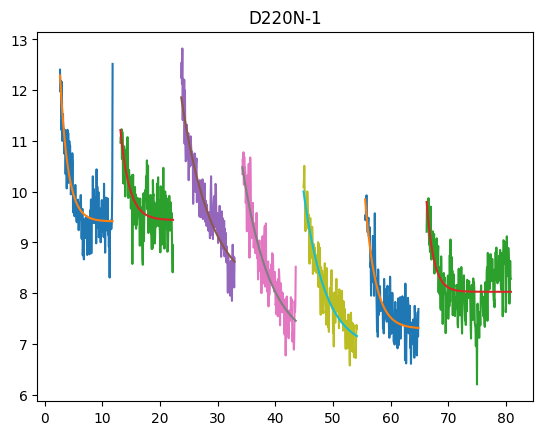

[2.28262736 4.79761766 6.04500178]
chi2 =  2.9092347594617065
[3.06985727 4.82866963 5.78571249]
chi2 =  1.9783973194597317
[3.61835554 6.77879452 5.03823266]
chi2 =  1.6700760742958265
[2.34957545 2.58424638 6.25610704]
chi2 =  1.7505697460820284
[2.55635702 2.35715354 6.26846327]
chi2 =  3.4395684080892153
[2.28789099 4.2435099  6.08192906]
chi2 =  2.0023402536050163
[2.03369738 4.15118537 6.15071493]
chi2 =  3.3479454813172937


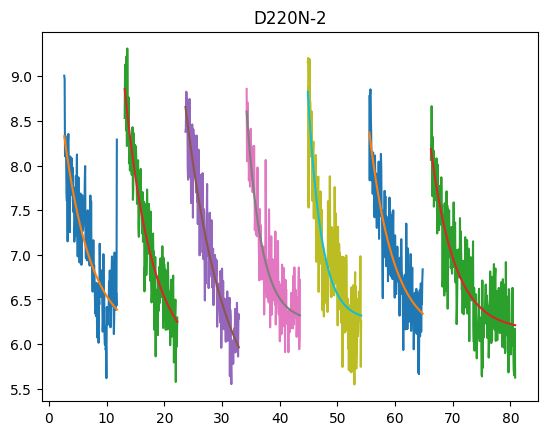

In [12]:
taus_D = []

for col in D_cols:
    t = np.array(data_D['t'])
    D = np.array(data_D[col])
    
    ts = []
    Ds = []
    
    tau_D = []
    
    for i in range(len(off_D)):
        ts.append(t[off_D[i]:on_D[i+1]])
        Ds.append(D[off_D[i]:on_D[i+1]])

    for i in range(len(off_D)):
#         print(i)
#         print(ts[i])
#         print(ts[i][0])
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], Ds[i], p0 = [2.87754275, 1.37764127, 9.41354768])
        print(popt)
        plt.plot(ts[i], Ds[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau_D.append(popt[1])
        
        chi = stats.chisquare(Ds[i], exp(ts[i]-ts[i][0], *popt))[0]
        print('chi2 = ',  chi)
    taus_D.append(tau_D)

    plt.title(col)
    plt.show()

    

In [13]:
taus_D

[[1.3776238881126317,
  1.5621305463164534,
  5.280577854401901,
  4.859030951210982,
  3.7568484153535193,
  1.816204793824631,
  1.2321987437798438],
 [4.797617660603589,
  4.828669628441554,
  6.778794517410742,
  2.5842463823410617,
  2.357153544892722,
  4.243509897652833,
  4.15118536548486]]

In [14]:
print(off_wt[0])

[38, 200, 365, 525, 692, 860]


[ 1.58552136  0.98042711 11.47526878]
[ 2.11135933  0.32609625 11.22779161]
[ 1.0489351   0.80609849 12.08674995]
[ 3.68794688  0.31681957 12.61710559]
[ 2.04822649  0.15159895 13.72536874]
[ 1354.01633058  8083.48784837 -1339.89321129]


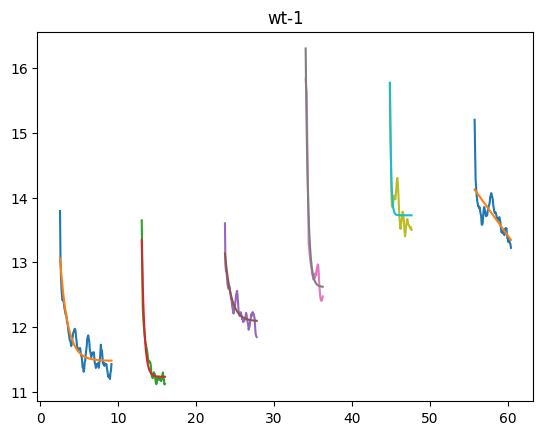

[ 3.85264395  0.53596928 38.89398121]
[ 4.36701998  0.1894903  38.92439092]
[ 2.20994205  0.09878734 38.06154538]
[ 2.82928683  0.1118305  34.22063068]
[ 3.50665088  0.11520924 35.78873852]
[ 2.11275819  0.59560519 35.82890031]


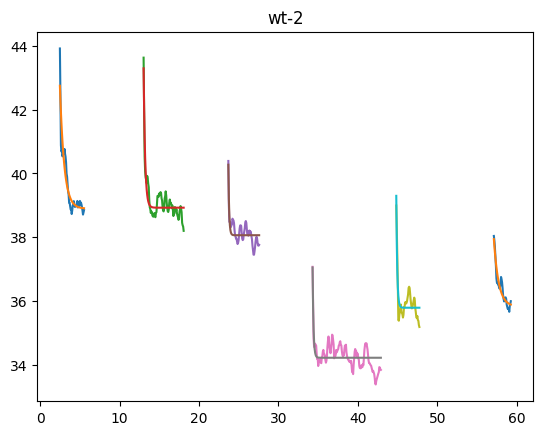

[1.84901824 1.02278794 9.30788941]
[2.32903465 1.54316578 8.75520238]
[2.0741856  1.33872824 8.37964735]
[1.51672263 1.92177641 9.36164746]
[ 2452.08481618  7861.76354588 -2441.67817841]
[1.34155605 0.88902527 9.28868983]


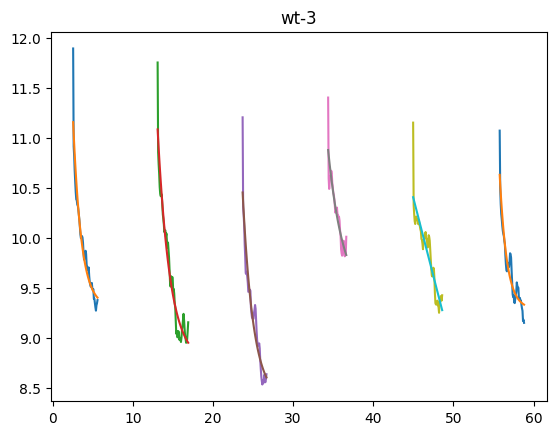

[2.0289106  2.48494658 9.79770967]
[2.81182862 0.21961887 9.94291382]
[2.30663315 1.89760555 9.85430792]
[ 2.33349766  0.43840289 11.50987093]
[ 4.01446889  0.750865   11.88984474]
[ 1.4555627   0.91604949 12.55296621]


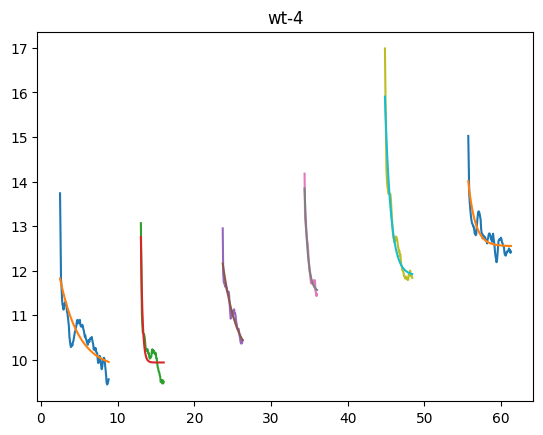

In [15]:
taus_wt = []

for num, col in enumerate(wt_cols):
    t = np.array(data_wt['t'])
    wt = np.array(data_wt[col])
    
    t = moving_average(t, 4)
    wt = moving_average(wt, 4)
    
    ts = []
    wts = []
    
    tau_wt = []
    
    for i in range(len(off_wt[num])):
        ts.append(t[off_wt[num][i]:on_wt[num][i]+1])
        wts.append(wt[off_wt[num][i]:on_wt[num][i]+1])

    for i in range(len(off_wt[num])):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], wts[i], p0 = [3,  1, 10])
        print(popt)
        plt.plot(ts[i], wts[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau_wt.append(popt[1])
        
    taus_wt.append(tau_wt)

    plt.title(col)
    plt.show()

    

In [16]:
taus_wt
for i in taus_wt:
    for j in i:
        if j>=10:
            i.remove(j)

In [17]:
all_taus_wt = sum(taus_wt, [])
all_taus_D = sum(taus_D, [])

mean_taus_wt = list(map(np.mean, taus_wt))
mean_taus_D = list(map(np.mean, taus_D))

mean_taus_D


[2.840659313285709, 4.248739570975337]

In [18]:
def p_value(p):
    if ((0.05 < p) & (p <= 1)):
        return 'ns'
    elif ((0.01 < p) & (p <= 0.05)):
        return '*'
    elif ((0.001 < p) & (p <= 0.01)):
        return '**'
    elif ((0.0001 < p) & (p <= 0.001)):
        return '***'
    elif (p <= 0.0001):
        return '****'
p_value_vec = np.vectorize(p_value)

In [19]:
res = stats.ttest_ind(a=all_taus_wt, b=all_taus_D)
p = p_value(res[1])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

wt v.s. D220N: Custom statistical test, P_val:9.524e-08


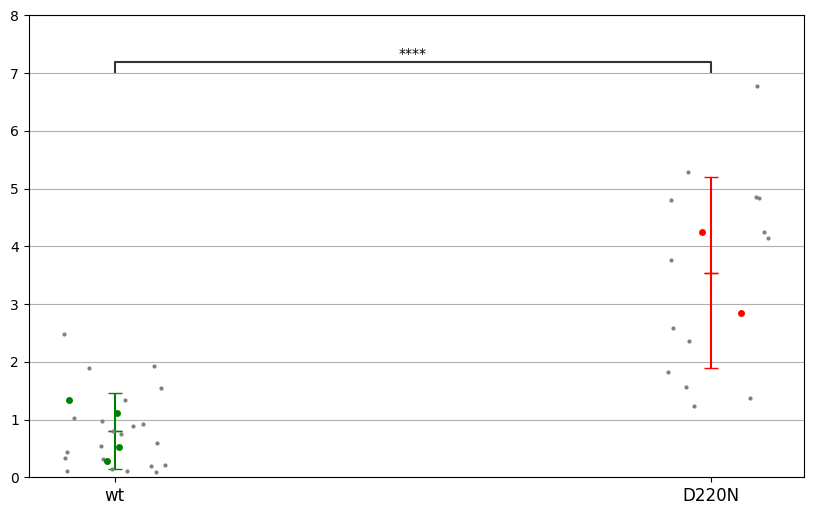

In [20]:
y = np.array([np.mean(all_taus_wt), np.mean(all_taus_D)])
x = ['wt', 'D220N']
yerr = [np.std(all_taus_wt), np.std(all_taus_D)]

c = ['gray']
colors = ['green', 'red']
sns.set_palette(c)

fig = plt.figure(figsize = (10, 6), dpi = 100)
ax0 = plt.subplot(1, 1, 1)

for i in range(2):
    ax0.errorbar([x[i]], [y[i]], yerr=[yerr[i]], capsize=5,  fmt = ' ', color = colors[i])
    ax0.errorbar([x[i]], [y[i]], yerr=[0], capsize=5,  fmt = ' ', color = colors[i])

# ax0.errorbar(x, y, yerr=yerr, capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar(x, y, yerr=np.zeros(2), capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar()

sns.stripplot(x=['wt']*len(all_taus_wt), y=all_taus_wt, size = 3)
sns.stripplot(x=['D220N']*len(all_taus_D), y=all_taus_D, size = 3)

sns.stripplot(x=['wt']*len(mean_taus_wt), y=mean_taus_wt, color='green')
sns.stripplot(x=['D220N']*len(mean_taus_D), y=mean_taus_D, color = 'red')

plt.grid(axis='y')
plt.xticks(rotation = 0, size = 12)
plt.ylim(0, 8)

add_stat_annotation(ax0, x=x, y=y+3, perform_stat_test=False, box_pairs=[['wt', 'D220N']],  pvalues=[res[1]])

plt.show()